### Preparando os dados

In [1]:
import pandas as pd

path = r'C:\Users\Levy\Desktop\ICA\ICA\Dados\datasets\artificial\cano\data.csv'

data = pd.read_csv(path)

data = pd.DataFrame(data)

data

,325,303,1
0,444,169,2
1,169,115,2
2,334,156,2
3,495,286,2
4,388,555,2
...,...,...,...
394,427,150,2
395,361,336,1
396,265,115,2
397,506,290,2


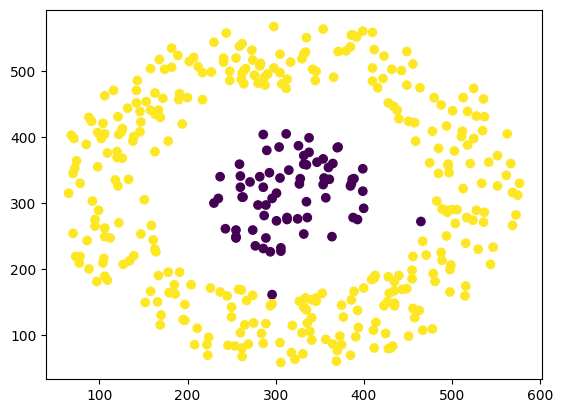

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x = data['325'], y = data['303'], c=data['1'], cmap = 'viridis')

In [3]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)
dados_normalizados.head()

X = dados_normalizados.drop(columns='1')
y = dados_normalizados['1']


XB = data.drop(columns='1')
yB = data['1']

In [4]:
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Para mostrar as metricas

def metricas(matriz_confusao):
    VP, FN = matriz_confusao[0]
    FP, VN = matriz_confusao[1]
    sensibilidade = VP/(VP+FN)
    especificidade =VN/(FP+VN)
    acuracia = (VP + VN)/(VP+FN+FP+VN)
    return [sensibilidade, especificidade, acuracia]
    

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)


mlpB = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlpB.fit(X_trainB, y_trainB)
prediB = mlpB.predict(X_testB)

# Matriz de confusão para calcular as métricas
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predi)

array([[12,  0],
       [ 0, 68]], dtype=int64)

In [7]:
confusion_matrix(y_testB, prediB)

array([[ 9,  3],
       [ 5, 63]], dtype=int64)

In [8]:
metrics = metricas(confusion_matrix(y_test, predi))
metricsB = metricas(confusion_matrix(y_testB, prediB))

print('MLP COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('MLP COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')


MLP COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 1.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 1.0 

MLP COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.75; ESPECIFICIDADE: 0.9264705882352942;  ACURÁCIA: 0.9


In [9]:
from sklearn.naive_bayes import GaussianNB

naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

naiveBayesGaussianB = GaussianNB()
naiveBayesGaussianB.fit(X_trainB, y_trainB)
prediNBB = naiveBayesGaussianB.predict(X_testB)

print(confusion_matrix(prediNB, y_test))

[[ 7  0]
 [ 5 68]]


In [10]:
print(confusion_matrix(prediNBB, y_testB))

[[ 7  0]
 [ 5 68]]


In [11]:
metrics = metricas(confusion_matrix(y_test, prediNB))
metricsB = metricas(confusion_matrix(y_testB, prediNBB))

print('NAIVE BAYES COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('NAIVE BAYES COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')


NAIVE BAYES COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.5833333333333334; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.9375 

NAIVE BAYES COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.5833333333333334; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.9375


In [12]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)

svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)



svcB = SVC(kernel='rbf',C=5, gamma=0.1)

svcB.fit(X_trainB, y_trainB)
prediSVCB = svcB.predict(X_testB)


print(confusion_matrix(prediSVC, y_test))

[[ 0  0]
 [12 68]]


In [13]:
print(confusion_matrix(prediSVCB, y_testB))

[[ 2  0]
 [10 68]]


In [14]:
metrics = metricas(confusion_matrix(y_test, prediSVC))
metricsB = metricas(confusion_matrix(y_testB, prediSVCB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.85 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.16666666666666666; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.875


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc_pol = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_pol.fit(X_train, y_train)
prediSVC_poli = svc_pol.predict(X_test)

print(confusion_matrix(prediSVC_poli, y_test))



[[ 0  0]
 [12 68]]


In [16]:
svc_polB = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_polB.fit(X_trainB, y_trainB)
prediSVC_poliB = svc_polB.predict(X_testB)


print(confusion_matrix(prediSVC_poliB, y_testB))

[[ 0  0]
 [12 68]]


In [17]:
metrics = metricas(confusion_matrix(y_test, prediSVC_poli))
metricsB = metricas(confusion_matrix(y_testB, prediSVC_poliB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.85 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.85


In [18]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=9, gamma=5, degree=4)


svc_lin.fit(X_train, y_train)
prediSVC_lin = svc_lin.predict(X_test)

print(confusion_matrix(prediSVC_lin, y_test))


[[ 0  0]
 [12 68]]


In [19]:
metrics = metricas(confusion_matrix(prediSVC_lin, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: nan; ESPECIFICIDADE: 0.85;  ACURÁCIA: 0.85


C:\Users\Levy\AppData\Local\Temp\ipykernel_5168\662972416.py:6: RuntimeWarning: invalid value encountered in scalar divide
  sensibilidade = VP/(VP+FN)
